<a href="https://colab.research.google.com/github/moktan456/COMP6016/blob/main/Answers_02_DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 02 - Data Preparation
In this practical we'll be using Python/[Pandas](https://pandas.pydata.org) to explore and visualise some example data using [Jupyter Notebooks](https://jupyter.org) in [Google Colaboratory](https://colab.research.google.com).

At the start of each practical you should make a copy of the notebook in your own google drive:
- File -> Save as copy in Drive

If you would prefer to work with a Jupyter Lab session ony your own machine you can download the notebook directly via:
- File -> Downaload -> Download .ipynb

In this practial we will be preparing data for use with some data mining applications.

The data for this week can be found on [GitHub](https://github.com/PaulHancock/COMP5009_pracs).


## Titanic revisited

Last week we explored the titanic manifest dataset using SQL.
This week we'll start by re-doing much of this exploration as we learn to use python, pandas, and jupyter notebooks.

Complete the following tasks:
1. Load the data file [titanic.csv](https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/titanic.csv) from GitHub.
2. Display the first 10 rows of the dataset.
3. Examine the column names and content and determine an appropriate data type for each.
  - Look at the data types used by pandas and comment on any differences
4. Is the data multidimensional?  
  - Find the number of attributes and the number of instances.
5. For each attribute:
  - check if there are any missing entries
  - Find the min, max, avg, sum values if relevant
  - Plot a histogram of the data
6. Select all the passengers with "Dr." in their name.
  - Group these data by sex
7. Compute the average fare grouped by class and embarkation port.
  

In [ ]:
# Load the modules that we'll be using
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# np, pd, and plt are common shorthands for these often used modules

### 1. Load the data
Load the data into a pandas data frame

In [ ]:
# The data are hosted in github and we can load it directly from the URL
data_url = 'https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/titanic.csv'
tt_df = pd.read_csv(data_url)

In [ ]:
# view the loaded data to make sure that it makes sense
tt_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Display the first 10 rows
We can make use of the `.head()` method provided by the data frame.
Try also:
- df.head(5)
- df.tail()

In [ ]:
tt_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Examine the data
Examine the column names and content and determine an appropriate data type for each.
  - Look at the data types used by pandas and comment on any differences

In [ ]:
print("Column Names")
print(tt_df.columns)
print()
print("Data types")
print(tt_df.dtypes)

Column Names
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data types
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### 4. Is the data multidimensional?  
Find the number of attributes and the number of instances.

In [ ]:
# the shape attribute will show the number of (rows, columns)
tt_df.shape

(891, 12)

### 5. Summarise the data
For each attribute:
  - check if there are any missing entries
  - Find the min, max, avg, sum values if relevant
  - Plot a histogram of the data

In [ ]:
tt_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# if we run a funciton on the data frame it runs on ech column.
# `numeric_only=True` means that we ignore the text columns
tt_df.sum(numeric_only=True)

PassengerId    397386.0000
Survived          342.0000
Pclass           2057.0000
Age             21205.1700
SibSp             466.0000
Parch             340.0000
Fare            28693.9493
dtype: float64

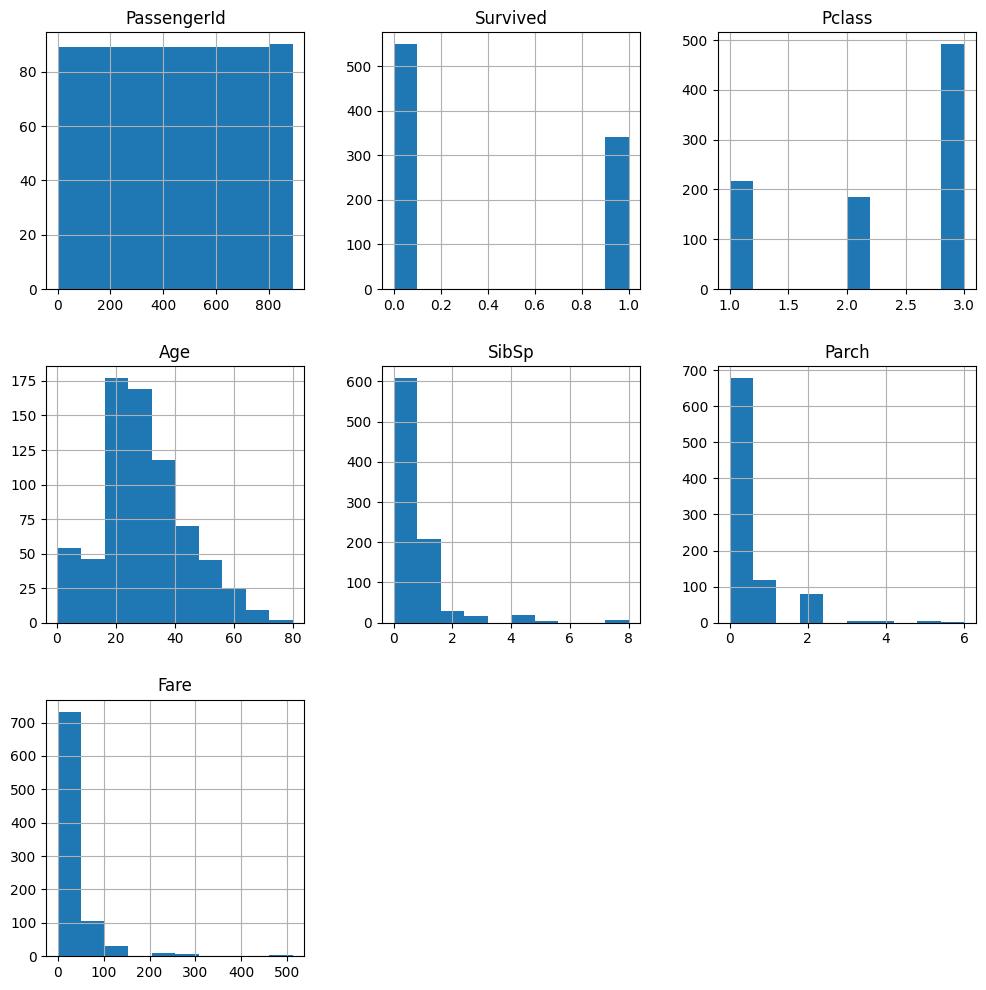

In [ ]:
# We can plot a histogram of all the data together
tt_df.hist(figsize=(12,12))
plt.show()

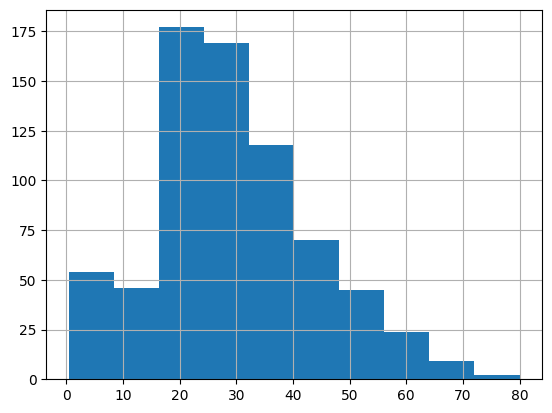

In [ ]:
# or one by one
tt_df['Age'].hist()
plt.show()

### 6. Find the doctors
Select all the passengers with "Dr." in their name.
- Group these data by sex

In [ ]:
# in sql we have a filter using the WHERE clause to select our data
filter = tt_df['Name'].str.contains('Dr\.')
doctors = tt_df[filter]
# then we GROUP BY, and then we run the count() command
# there is no pandas equivalent of count(*) so we have to run count on a column with no NULLs
doctors.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,1,1,1,1,1,1,1,1,1,1,1
male,6,6,6,6,5,6,6,6,6,2,6


### 7. Average fare
Compute the average fare grouped by class and embarkation port.

In [ ]:
# Remeber the ordering:
# group, select columns, compute
tt_df.groupby(['Pclass','Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

## Q3 from Chapter 2 of [Aggarwal](https://www.springer.com/gp/book/9783319141411)

We will be working with the Arrythmia data set from the UCI Machine Learning Repository at http://archive.ics.uci.edu/ml/datasets/arrhythmia. The data are available via github as [arrhythmia.data.with.header.csv](https://github.com/PaulHancock/COMP5009_pracs/blob/main/data/arrhythmia.data.with.header.csv)

Use Pandas to load the data and complete the following tasks:
1. Load the data into a pandas data frame, converting '?' into `NaN`

1. Find and remove all attributes with more than 80% missing values.

1. Detect all duplicate rows and remove them if found.

1. Find all attributes with less than 5% missing values and replace these missing values with either the mean or the mode of the attribute.  

1. Discretize attributes att3 and att4 into 10 equi-width ranges and 10 equi-depth ranges respectively.

  a. Examine and comment on the intervals in each case.

1. Standardize all numeric attributes to a mean of 0 and a standard deviation of 1.

1. Create a database `arrythmia.db`.
  
  a. Randomly sample 100 instances and save them to a table called `test`.

  b. Save the remaining instances to a table called `train`.

### Load the data
Load the data into a pandas data frame, converting '?' into `NaN`


Look at last week's prac and load the data into our data frame.

The link to the data file should be: https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/arrhythmia.data.with.header.csv

The difference here is that the csv file uses '?' to indicate missing values. This is annoying but pandas has a workaround.
Look at the help for the `pd.read_csv` to see what parameter you might use to indicate that '?' should be interpreted as `NaN`.

In [ ]:
import pandas as pd

In [ ]:
# load the data into our data frame
data_url = 'https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/arrhythmia.data.with.header.csv'
ar_df = pd.read_csv(data_url, na_values='?')

In [ ]:
ar_df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att271,att272,att273,att274,att275,att276,att277,att278,att279,att280
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


### Remove attributes
Find and remove all attributes with more than 80% missing values.


We could use `df.describe()` however there are so many columns that we need an automated approach. Thus we will write a function to compute the fraction of missing rows, and print the name and fraction for each columnn.

In [ ]:
# find which columns have missing data
def missing(df):
  """
  For each attribute/column in the dataframe `df`, count the number of missing entries.
  Return a list of all the coulmns with more than 80% missing entries.
  """
  missing_dict = dict()
  total = df.shape[0] # shape[0] is the number of rows
  for attribute in df.columns:
    missing = df[attribute].isna().sum() # count the number of Null/nan/na values
    frac = missing/total * 100 # as a percentage
    missing_dict[attribute] = frac
  return missing_dict

In [ ]:
m_dict = missing(ar_df)
m_dict

{'att1': 0.0,
 'att2': 0.0,
 'att3': 0.0,
 'att4': 0.0,
 'att5': 0.0,
 'att6': 0.0,
 'att7': 0.0,
 'att8': 0.0,
 'att9': 0.0,
 'att10': 0.0,
 'att11': 1.7699115044247788,
 'att12': 4.867256637168142,
 'att13': 0.22123893805309736,
 'att14': 83.1858407079646,
 'att15': 0.22123893805309736,
 'att16': 0.0,
 'att17': 0.0,
 'att18': 0.0,
 'att19': 0.0,
 'att20': 0.0,
 'att21': 0.0,
 'att22': 0.0,
 'att23': 0.0,
 'att24': 0.0,
 'att25': 0.0,
 'att26': 0.0,
 'att27': 0.0,
 'att28': 0.0,
 'att29': 0.0,
 'att30': 0.0,
 'att31': 0.0,
 'att32': 0.0,
 'att33': 0.0,
 'att34': 0.0,
 'att35': 0.0,
 'att36': 0.0,
 'att37': 0.0,
 'att38': 0.0,
 'att39': 0.0,
 'att40': 0.0,
 'att41': 0.0,
 'att42': 0.0,
 'att43': 0.0,
 'att44': 0.0,
 'att45': 0.0,
 'att46': 0.0,
 'att47': 0.0,
 'att48': 0.0,
 'att49': 0.0,
 'att50': 0.0,
 'att51': 0.0,
 'att52': 0.0,
 'att53': 0.0,
 'att54': 0.0,
 'att55': 0.0,
 'att56': 0.0,
 'att57': 0.0,
 'att58': 0.0,
 'att59': 0.0,
 'att60': 0.0,
 'att61': 0.0,
 'att62': 0.0,
 'att

In [ ]:
# Look at each attribute/frac pair in the dict and choose those with a frac that is >80
cols_to_drop = [ att for att,frac in m_dict.items() if frac >80]
cols_to_drop

['att14']

Deleting the columns can be done with the `.drop()` function, we just need a list of columns to remove.

In [ ]:
# figure out which columns you want to drop from above, and put their names in the list below
cols_to_drop = ['att14'] # Fill this in
ar_df.drop(columns=cols_to_drop,
           inplace=True)

In [ ]:
# confirm that our data frame now has fewer columns (was 280)
ar_df.columns

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att271', 'att272', 'att273', 'att274', 'att275', 'att276', 'att277',
       'att278', 'att279', 'att280'],
      dtype='object', length=279)

### Detect and remove duplicates
Detect all duplicate rows and remove them if found.



Look at `duplicated` as a starting point. Try to show all duplicates (the ones that we will remove).

In [ ]:
dups = ar_df.duplicated()
dups

0      False
1      False
2      False
3      False
4      False
       ...  
447    False
448    False
449    False
450    False
451    False
Length: 452, dtype: bool

The dups variable is a series with too many rows to display so instead we can count the number of True values by using `sum()`

In [ ]:
# recall that true = 1, false = 0
dups.sum()

0

### Replace missing values
Find all attributes with less than 5% missing values and replace these missing values with either the mean or the mode of the attribute.

In [ ]:
# Look at each attribute/frac pair in the dict and choose those with a frac that is <5
cols_to_impute = [ att for att,frac in m_dict.items() if 0<frac <5]
cols_to_impute

['att11', 'att12', 'att13', 'att15']

Look at the `fillna()` function for ways to replace the `NaN` values.

In [ ]:
for col in cols_to_impute:
  # compute the mean
  mean = ar_df[col].mean()
  # now use the fillna function to replace the NaN avalues with the mean value
  ar_df[col].fillna(mean, inplace=True)

In [ ]:
m_dict = missing(ar_df)
for col in cols_to_impute:
  print(col, "missing data", m_dict[col])

att11 missing data 0.0
att12 missing data 0.0
att13 missing data 0.0
att15 missing data 0.0


### Discritize attributes
Discretize attribute att4 into 10 equi-width ranges and 10 equi-depth ranges respectively.

a. Examine and comment on the intervals in each case.

First lets get a summary of the attribute so that we can see what we are dealing with here

In [ ]:
ar_df['att4'].describe()

count    452.000000
mean      68.170354
std       16.590803
min        6.000000
25%       59.000000
50%       68.000000
75%       79.000000
max      176.000000
Name: att4, dtype: float64

Look at the documentation for `qcut` and `cut` for help with this one.

In [ ]:
# This will display help for the pd.cut function in the browser (this is Jupyter magic, not part of normal python)
?pd.cut

In [ ]:
# use cut to create 10 equal width bins
# make sure the bins are returned
# but do not use labels for the bin names (use integers)

results, bins = pd.cut(ar_df['att4'], bins=10, labels=False,retbins=True)

print("bin name | number of entries")
print(results.value_counts(sort=False))
print()
print("The bin edges")
print(bins)

att4_10_equi_width = results

bin name | number of entries
4    122
3    205
5     24
2     80
0      7
1     11
9      1
6      2
Name: att4, dtype: int64

The bin edges
[  5.83  23.    40.    57.    74.    91.   108.   125.   142.   159.
 176.  ]


<Axes: ylabel='Frequency'>

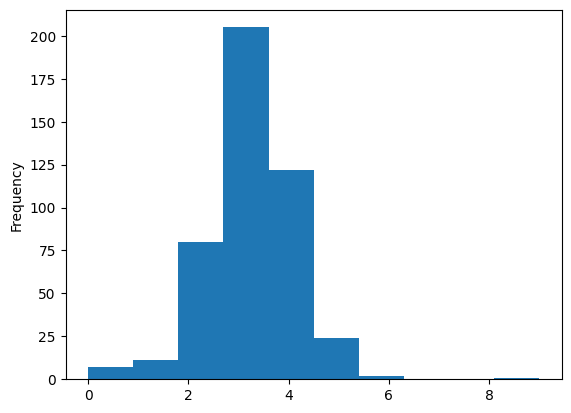

In [ ]:
# plot a histogram of the equiwidth data
att4_10_equi_width.plot(kind='hist')

In [ ]:
# now use qcut to create equal depth bins (or at least try)
# use 10 quantiles
# use integers for bin labels
# drop the duplicate bin edges
# return the bin edges
# look at the help for qcut to figure out what parameters to pass
results, bins = pd.qcut(ar_df['att4'],
                        q=10,   # we still have 10 bins but we call them quantiles
                        labels=False,
                        duplicates='drop', # remove bin edges that are not unique
                        retbins=True)

print("bin name | number of entries")
print(results.value_counts(sort=False))

print("The bin edges")
print(bins)
att4_10_equi_depth = results

bin name | number of entries
7    54
3    65
9    44
0    52
1    42
4    29
5    49
8    36
2    43
6    38
Name: att4, dtype: int64
The bin edges
[  6.  52.  56.  60.  65.  68.  72.  75.  80.  86. 176.]


<Axes: ylabel='Frequency'>

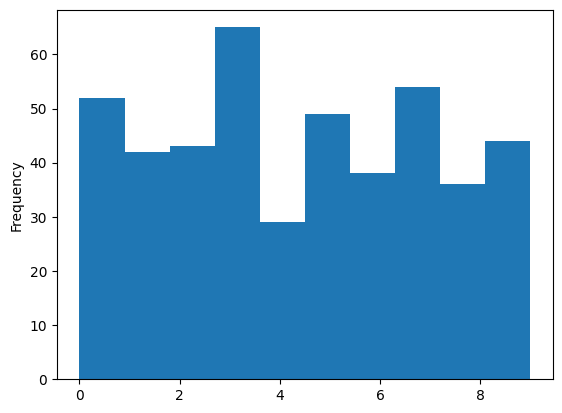

In [ ]:
# plot a histogram
att4_10_equi_depth.plot(kind='hist')

### Standardise numeric attributes
Standardize all numeric attributes to a mean of 0 and a standard deviation of 1.

So for each atttribute compute the mean ($\mu$) and the standard deviation ($\sigma$) and then replace the values with $z= \frac{x-\mu}{\sigma}$

`sklearn` has a `preprocessing` package that has a `StandardScaler` that we can use for this.

Note: There is also a `MinMaxScaler` that works in the same way.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Inspect the data frame and note the mean/std for the columns
ar_df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att271,att272,att273,att274,att275,att276,att277,att278,att279,att280
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
# choose all the numeric type attributes (all of them)
numeric_attributes = ar_df.select_dtypes(include='number').columns
numeric_attributes

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att271', 'att272', 'att273', 'att274', 'att275', 'att276', 'att277',
       'att278', 'att279', 'att280'],
      dtype='object', length=279)

In [ ]:
# Create a standard scaler
scaler = StandardScaler()
# Determine the mean/std for each column and set up the scaler
scaler.fit(ar_df[numeric_attributes])

# Now transform our data using this scaler, replacing the original data
ar_df[numeric_attributes] =  scaler.transform(ar_df[numeric_attributes])
# if you have other data frames that you want to scale with the same transform you can do it as
# other_df[numeric_attributes] = scaler.transform(other_df[numeric_attributes])

In [ ]:
# verify that this worked
# the mean should be close to zero, and the std should be close to 1.
ar_df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att271,att272,att273,att274,att275,att276,att277,att278,att279,att280
count,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,...,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,452.0,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02
mean,-3.929993e-17,-7.859986e-17,3.812093e-16,2.318696e-16,2.515196e-16,-1.213385e-16,2.908195e-16,3.222594e-16,-3.536994e-17,5.894990e-17,...,-1.031623e-17,-8.645985e-17,2.357996e-17,5.894990e-18,0.0,2.240096e-16,4.715992e-17,-2.279396e-16,1.414797e-16,3.536994e-17
std,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,...,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,0.0,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00
min,-2.825273e+00,-1.107520e+00,-1.647977e+00,-3.751430e+00,-2.210171e+00,-3.463797e+00,-4.054398e+00,-1.740455e+00,-3.488806e+00,-4.532212e+00,...,-6.969248e+00,-2.608233e+00,-1.356990e+01,-7.954641e-02,0.0,-3.787521e+00,-5.070186e+00,-4.709483e+00,-3.684921e+00,-6.543361e-01
25%,-6.366112e-01,-1.107520e+00,-1.666627e-01,-5.533497e-01,-5.812294e-01,-2.936342e-01,-5.160046e-01,-6.166585e-01,-4.265602e-01,-6.594586e-01,...,-2.663253e-01,-7.056777e-01,-3.213153e-01,-7.954641e-02,0.0,-3.307628e-01,-5.070962e-01,-5.838921e-01,-6.454249e-01,-6.543361e-01
50%,3.214664e-02,9.029181e-01,-5.893079e-02,-1.027935e-02,-1.902834e-01,4.124215e-02,-6.236106e-03,-2.233297e-01,3.859109e-02,1.393312e-01,...,5.088427e-01,-7.149251e-02,1.786314e-01,-7.954641e-02,0.0,-4.269964e-02,8.961548e-02,-9.089691e-02,-8.516165e-02,-6.543361e-01
75%,7.009045e-01,9.029181e-01,1.026671e-01,6.534732e-01,3.309779e-01,4.430938e-01,5.035324e-01,2.542838e-01,4.649798e-01,7.122563e-01,...,5.088427e-01,6.203458e-01,7.285727e-01,-7.954641e-02,0.0,5.334268e-01,6.161258e-01,4.817930e-01,6.307303e-01,4.814547e-01
max,2.220809e+00,9.029181e-01,1.653179e+01,6.506564e+00,6.455798e+00,8.234551e+00,4.251830e+00,5.929456e+00,4.457528e+00,2.981921e+00,...,5.088427e-01,4.194844e+00,7.285727e-01,1.590044e+01,0.0,5.430501e+00,3.353980e+00,5.150420e+00,4.678430e+00,2.753036e+00


### Random sampling
Create a database arrythmia.db.

a. Randomly sample 100 instances and save them to a table called test.

b. Save the remaining instances to a table called train.

In [ ]:
import sqlite3 as sql

In [ ]:
# connect to a database on disk with a given name
# check the file browser on the left to see that the file has been created.
con = sql.connect('arrythmia.db')

Look at `sample` to generate a random selection of rows/instances

In [ ]:
test = ar_df.sample(n=100)
test

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att271,att272,att273,att274,att275,att276,att277,att278,att279,att280
418,50,1,163,65,75,151,362,137,93,43,...,-0.4,5.1,-1.3,0.0,0,0.7,1.0,6.2,11.6,1
103,27,0,170,66,86,195,414,182,80,43,...,0.0,18.8,0.0,0.0,0,0.2,3.7,56.4,87.4,1
159,46,1,153,70,84,153,383,181,86,-14,...,0.0,6.6,-2.0,0.0,0,0.3,1.5,9.7,22.9,1
32,50,1,160,73,75,125,353,183,63,38,...,-0.5,8.1,-0.8,0.0,0,0.7,2.5,14.5,39.5,1
441,37,1,160,50,74,143,374,146,75,68,...,0.0,11.4,-0.9,0.0,0,0.7,1.8,40.1,55.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,45,1,162,61,75,122,357,143,72,50,...,0.0,11.6,0.0,0.0,0,0.7,1.4,27.8,35.9,1
30,53,0,175,85,85,157,408,172,91,-52,...,0.0,4.5,-1.6,0.0,0,0.7,1.1,8.6,16.3,6
138,35,1,162,68,80,156,364,134,116,60,...,-0.6,10.2,-1.6,0.0,0,1.3,1.0,17.0,23.6,1
308,62,1,170,110,97,0,294,184,0,39,...,0.0,15.3,0.0,0.0,0,-0.5,0.2,36.7,38.9,2


Now the inverse problem. Not so easy as there is no pandas function that will directly give us the inverse of the above.

Instead we can remove the test data from the full data set to give us the training data.

In [ ]:
train = ar_df.drop(test.index)
train

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att271,att272,att273,att274,att275,att276,att277,att278,att279,att280
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,20,1,157,57,81,151,363,166,80,43,...,0.0,7.2,-0.7,0.0,0,0.5,2.3,17.6,39.2,1
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2


we save our tables to our database.

We *don't* want the pandas index as it's not a useful value to save.

We want to save each data frame to a different table in the databse so we must provide a name.


In [ ]:
# use test/train as the table names
# don't include the pandas index in the database
test.to_sql('test', con, index=False)
train.to_sql('train', con, index=False)

Look in the current directory to see these files and download them. On the left panel click the file explorer to see the files.

## Q13 from Chapter 3 of [Aggarwal](https://www.springer.com/gp/book/9783319141411)

Use the modified KDD Cup 1999 data set provided as `kddcup.csv` and specifically examine attribute `count`.

1. The data are available via github as [kddcup.arff](https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/kddcup99.arff), load them as a pandas data frame

1. Compute the average µ and standard deviation σ of the `count` attribute over 10,000 samples.

1. Randomly select a subset of n samples from this data set with
  n = 10; 20; 50; 100; 200; 500; 1000; 2000; 5000; 10000:

  For each value of n compute the average $e_n$ of the attribute over the subset and then derive the following quantity:

  $z_n=\frac{|e_n-\mu|}{\sigma}$

  You should repeat this at least 10 times and obtain the average of zn.

1. Plot $z_n$ versus n and make a comment on the graph you have plotted.


### Load the data

The data are available via github as [kddcup.csv](https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/kddcup99.arff), load them as a data frame

In [ ]:
import pandas as pd
import numpy as np
# This time the file is in arff format so we need a library that can read it
from scipy.io import arff
import urllib
import urllib.request

The file that we are working with is in `arff` format, which can't be read directly by pandas. Instead we use an arff loader from `scipy.io`, but we must first download the file before we can open it.

In [ ]:
data_url = 'https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/kddcup99.arff'
file_name = 'kddcup99.arff'
# this will download the file, look in your explorer to confirm
urllib.request.urlretrieve(data_url, file_name)

('kddcup99.arff', <http.client.HTTPMessage at 0x79c73332ead0>)

In [ ]:
# load the data from arff format
data = arff.loadarff(file_name)
kd_df = pd.DataFrame(data[0])

### Compute $\mu$ and $\sigma$
Compute the average µ and standard deviation σ of the `count` attribute over 10,000 samples.


In [ ]:
mu = kd_df['count'].mean()
sigma = kd_df['count'].std()
print(f"For attribute `count`: μ={mu:.2f}, σ={sigma:.2f}")

For attribute `count`: μ=332.76, σ=213.39


### Random subsets
Randomly select a subset of n samples from this data set with
  n = 10; 20; 50; 100; 200; 500; 1000; 2000; 5000; 10000:

  For each value of n compute the average $e_n$ of the attribute over the subset and then derive the following quantity:

  $z_n=\frac{|e_n-\mu|}{\sigma}$

  You should repeat this at least 10 times and obtain the average of zn.


In [ ]:
x = [10,20,50,100,200,1_000,2_000,5_000,10_000]
y = []
for n in x:
  # append to z for 10 iterations
  z = []
  for _ in range(10): # repeat 10 times to get the average of zn
    # compute e_n, and then z onsubsets of size n
    subset = kd_df['count'].sample(n)
    en = subset.mean()
    z.append(abs(en-mu)/sigma)
  # compute the average of zn and append to y
  zn = np.mean(z)
  y.append(zn)
  print(f'n={n}, zn={zn}')

n=10, zn=0.2661802851604328
n=20, zn=0.2572979240249912
n=50, zn=0.0859274948715087
n=100, zn=0.05686416929918532
n=200, zn=0.06374268025972199
n=1000, zn=0.03475948994930413
n=2000, zn=0.016888389289809295
n=5000, zn=0.007735255322033679
n=10000, zn=0.0


### Plot $z_n$
Plot $z_n$ versus n and make a comment on the graph you have plotted.

Let's use matplotlib directly for our plotting this time.

In [ ]:
from matplotlib import pyplot as plt

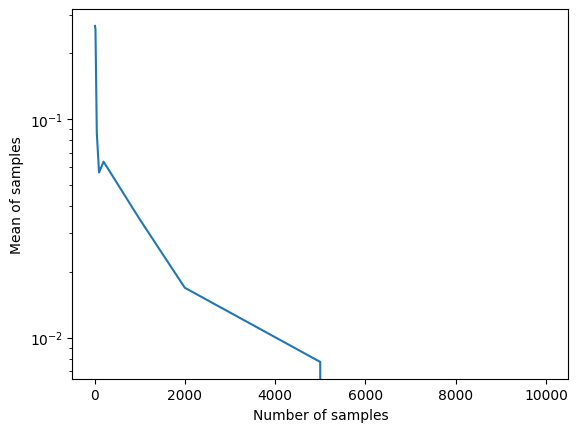

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,y)
ax.set_yscale('log')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Mean of samples')
plt.show()

What do we observe in the above?

Hint: try a log scale for the axes.